# Strogatz Nonlinear Dynamics and Chaos
## Chapter 2: One-dimensional flows
## Jeff Saucerman 2/15/2025

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize

### xdot = sin(x)
Figure 2.1.1. Plots x vs. xdot

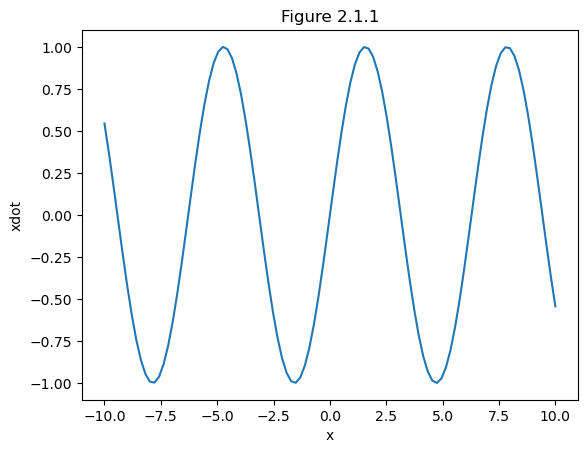

In [6]:
def xdot(t,x): 
    return np.sin(x)

xrange = np.linspace(-10,10,100)
fig, ax211 = plt.subplots()
ax211.plot(xrange,xdot(0,xrange))
ax211.set_xlabel('x')
ax211.set_ylabel('xdot')
ax211.set_title('Figure 2.1.1')
plt.show()


Figure 2.1.3. Simulations at varying initial conditions

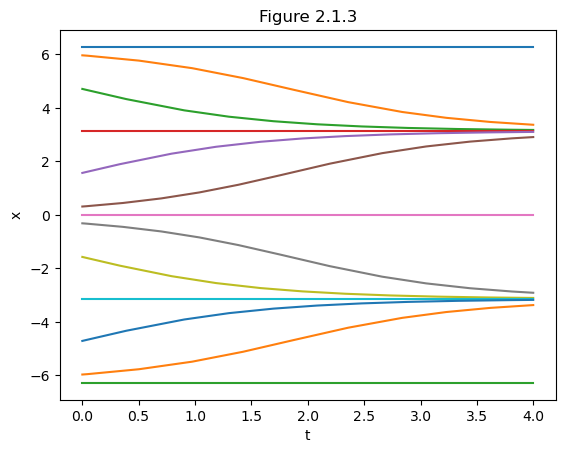

In [7]:
fig, ax213 = plt.subplots()
tspan = [0, 4]
y0range = np.pi*np.array([2, 1.9, 1.5, 1, 0.5, 0.1, 0, -0.1, -0.5, -1, -1.5, -1.9, -2])
for y0 in y0range:
    sol = scipy.integrate.solve_ivp(xdot,tspan,[y0],rtol=1e-6)
    ax213.plot(sol.t,sol.y.T)
ax213.set_xlabel('t')
ax213.set_ylabel('x')
ax213.set_title('Figure 2.1.3')
plt.show()

vector field

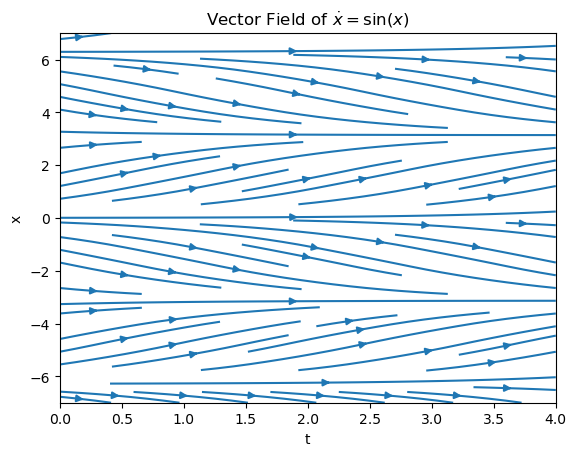

In [8]:
x = np.linspace(-7, 7, 20)
t = np.linspace(0, 4, 20)
X, T = np.meshgrid(x, t)
Xdot = xdot(T, X)
plt.figure()
#plt.quiver(T, X, np.ones_like(Xdot), Xdot, angles='xy')
plt.streamplot(t, x, np.ones_like(Xdot).T, Xdot.T, density=1)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Vector Field of $\dot{x} = \sin(x)$')
plt.show()

### xdot = x**2 - 1
Figure 2.2.2

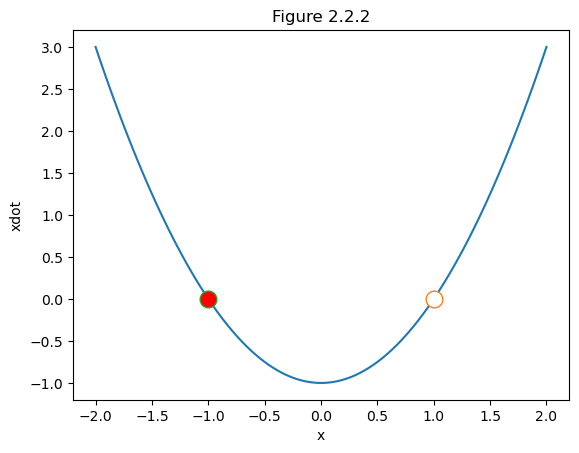

In [9]:
def xdot(t,x): 
    return x**2 - 1

xrange = np.linspace(-2,2,100)
fig, ax222 = plt.subplots()
ax222.plot(xrange,xdot(0,xrange))
ax222.set_xlabel('x')
ax222.set_ylabel('xdot')
ax222.set_title('Figure 2.2.2')

# find fixed points (need to view phase plot to guess root locations)
def equation(x): return xdot(0,x)           # make xdot autonomous
sol1 = scipy.optimize.root(equation,0.5)    # find two roots based on guesses
sol2 = scipy.optimize.root(equation,-0.5)
# plot roots (need to know stability by viewing phase plot)
ax222.plot(sol1.x[0],0,marker='o',markersize=12,markerfacecolor='white') # unstable
ax222.plot(sol2.x[0],0,marker='o',markersize=12,markerfacecolor='red') # stable
plt.show()

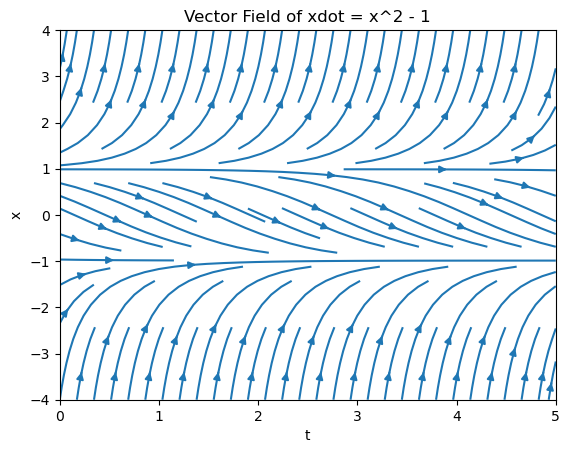

In [10]:
#%% vector field
# it should be stable for x < 1, unstable for x > 1
x = np.linspace(-4, 4, 20)
t = np.linspace(0, 5, 20)
X, T = np.meshgrid(x, t)
Xdot = xdot(T, X)
plt.figure()
plt.streamplot(t, x, np.ones_like(Xdot).T, Xdot.T, density=1)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Vector Field of xdot = x^2 - 1')
plt.show()

### Logistic equation, Ndot = r*n(1-N/K)
Figure 2.3.3

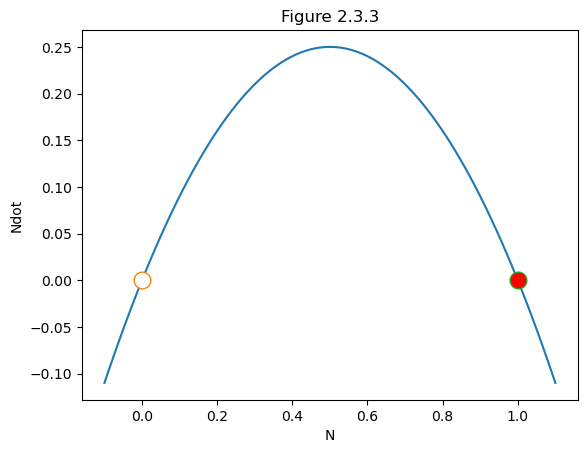

In [11]:
# r: growth rate
# K: carrying capacity
def Ndot(t,N,r,K): 
    return r*N*(1-N/K)
r = 1 
K = 1
xrange = np.linspace(-0.1,1.1,100)
fig, ax233 = plt.subplots()
ax233.plot(xrange,Ndot(0,xrange,r,K))
ax233.set_xlabel('N')
ax233.set_ylabel('Ndot')
ax233.set_title('Figure 2.3.3')

# find fixed points (need to view phase plot to guess root locations)
def equation(N,r,K): return Ndot(0,N,r,K)           # make xdot autonomous
sol1 = scipy.optimize.root(equation,0.1,args=(r,K))    # find two roots based on guesses
sol2 = scipy.optimize.root(equation,0.9,args=(r,K))
# plot roots (need to know stability by viewing phase plot)
ax233.plot(sol1.x[0],0,marker='o',markersize=12,markerfacecolor='white') # unstable f.p. at x = 0
ax233.plot(sol2.x[0],0,marker='o',markersize=12,markerfacecolor='red') # stable f.p. at x = 1
plt.show()

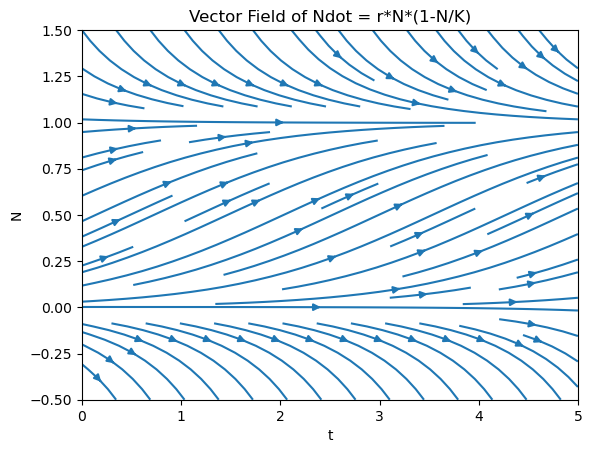

In [12]:
#%% vector field
# it should be stable for x > 0, unstable for x < 0
x = np.linspace(-0.5, 1.5, 20)
t = np.linspace(0, 5, 20)
X, T = np.meshgrid(x, t)
Ndotmat = Ndot(T, X, r, K)
plt.figure()
plt.streamplot(t, x, np.ones_like(Ndotmat).T, Ndotmat.T, density=1)
plt.xlabel('t')
plt.ylabel('N')
plt.title('Vector Field of Ndot = r*N*(1-N/K)')
plt.show()

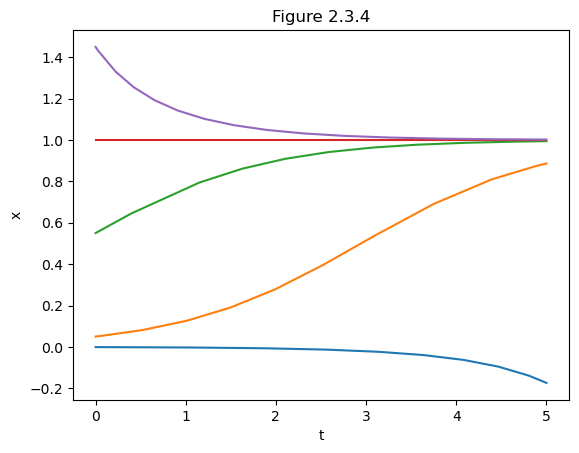

In [13]:
#%% Figure 2.3.4. Simulations at varying initial conditions
fig, ax234 = plt.subplots()
tspan = [0, 5]
y0range =np.array([-0.001, 0.05, 0.55, 1, 1.45])
for y0 in y0range:
    sol = scipy.integrate.solve_ivp(Ndot,tspan,[y0],rtol=1e-6,args=(r,K))
    ax234.plot(sol.t,sol.y.T)
ax234.set_xlabel('t')
ax234.set_ylabel('x')
ax234.set_title('Figure 2.3.4')
plt.show()

Text(0.5, 1.0, 'Figure 2.7.3')

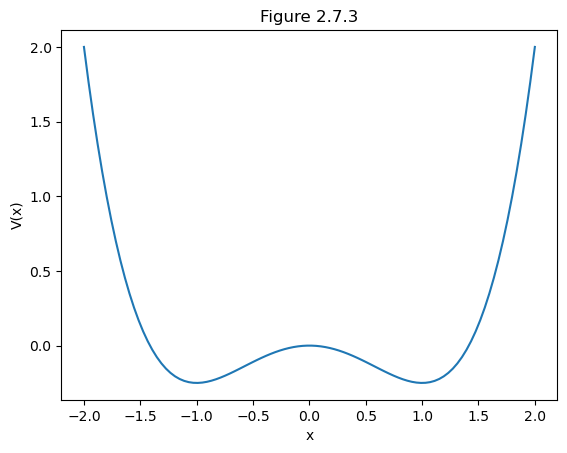

In [14]:
#%% Figure 2.7.3. Potential of a bistable system
def xdot(t,x): 
    return x-x**3 
def V(x):
    return -0.5*x**2 + 0.25*x**4 # V(x) = -integral(xdot,dx)
x = np.linspace(-2,2,100)
fig, ax273 = plt.subplots()
ax273.plot(x,V(x))
ax273.set_xlabel('x')
ax273.set_ylabel('V(x)')
ax273.set_title('Figure 2.7.3')